<h1>Pre-Processing Text for Natural Language Processing</h1>
This notebook uses data from the Kaggle: Bag of Words meets Bags of Popcorn competition. It focuses on understanding the different methods of processing text based data into a form understandable by machine learning models.

The task is to classify the sentiment of movie reviews using the IMBD Movie Review Dataset. Movie reviews can either be positive (1) or negative (0). Binary classification is typically a straight forward problem, hence this task allows us to focus on understanding the different pre-processing and tokenisation methods for text.  

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

<h2>Bag of Words</h2>
The first method for processing text into numbers explored was the Bag of Words method. In this method, text is first processed to remove all but (typically) the words. The remaining words are then numbered. Usually, the vocabulary will be reduced to only the most frequently occuring N words to reduce the dimensionality of the problem. This method removes word order however maintains multiplicity.

The logic for use of this method with the task at hand is that positive and negative reviews are likely to contain different types of words, for example, excellent, amazing, great compared to awful, boring, and terrible. For simplicity, we explore only words.

To begin, we explore the datast.

In [2]:
# Set the working directory path where the data files are located is specified.
Directory = r'D:\TechWork\NonConfidentialProjects\NLPForMovieReviews'

# Load the training dataset.
train_ds = pd.read_csv(os.path.join(Directory, "labeledTrainData.tsv"), header=0, delimiter="\t", quoting=3)

# Load in testing dataset.
test_ds = pd.read_csv(os.path.join(Directory, "testData.tsv"), header=0, delimiter="\t", quoting=3)

# Print the first 10 rows of training dataset.
train_ds.head(10)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."
5,"""8196_8""",1,"""I dont know why people think this is such a b..."
6,"""7166_2""",0,"""This movie could have been very good, but com..."
7,"""10633_1""",0,"""I watched this video at a friend's house. I'm..."
8,"""319_1""",0,"""A friend of mine bought this film for £1, and..."
9,"""8713_10""",1,"""<br /><br />This movie is full of references...."


Before analysing the training dataset further, we separate it into a training and validating set.

In [3]:
# Separate into training and testing dataset with a 70:30 split.
# Note the dataset is already shuffled.
train, validate = train_test_split(train_ds, test_size = 0.3, shuffle = False)

# Investigate the split of positive and negative samples
print(f'Train Dataset')
print(f'Positive Samples = {sum(train["sentiment"])/len(train):.2f}')
print(f'Negative Samples = {(len(train)-sum(train["sentiment"]))/len(train):.2f}')
print('\n')
print(f'Validate Dataset')
print(f'Positive Samples = {sum(validate["sentiment"])/len(validate):.2f}')
print(f'Negative Samples = {(len(validate)-sum(validate["sentiment"]))/len(validate):.2f}')

Train Dataset
Positive Samples = 0.50
Negative Samples = 0.50


Validate Dataset
Positive Samples = 0.50
Negative Samples = 0.50


The classification of reviews is split evenly in each dataset, limiting the potential biases.

To understand the better the content and format of the reviews, we read the first one.

In [4]:
train['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

The review contains HTML tags such as '< br >', punctuation such as '...' and escape characters for apostrophes. 

To remove HTML related features, we use Beautiful Soup, and demonstrate its use on the first review.

In [5]:
from bs4 import BeautifulSoup

# Create a Beautiful Soup object 
sample_1 = BeautifulSoup(train["review"][0])  

# Print the processed review
print(sample_1.get_text())

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 mi

For simplicity, we then removes all punctuation. We follow this and also immediately separate the dataset into individual words containing only lower case letters.

In [6]:
# Use reguar expressions to remove all non-letter characters,
letters_only = re.sub("[^a-zA-Z]"," ", sample_1.get_text() )

# Split the review into words of only lower case.
words = (letters_only.lower()).split() 

# Display results
print(words)

['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again', 'maybe', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into', 'this', 'guy', 'who', 'i', 'thought', 'was', 'really', 'cool', 'in', 'the', 'eighties', 'just', 'to', 'maybe', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent', 'moonwalker', 'is', 'part', 'biography', 'part', 'feature', 'film', 'which', 'i', 'remember', 'going', 'to', 'see', 'at', 'the', 'cinema', 'when', 'it', 'was', 'originally', 'released', 'some', 'of', 'it', 'has', 'subtle', 'messages', 'about', 'mj', 's', 'feeling', 'towards', 'the', 'press', 'and', 'also', 'the', 'obvious', 'message', 'of', 'drugs', 'are', 'bad', 'm', 'kay', 'visually', 'impressive', 'but', 'of', 'course', 'this', 'is', 'all', 'about', 

Next, we remove stop words. These are words commonly found in the language being analysed, for example, 'a' or 'the' within the English language. When considering sentiment analysis, it is logical to assume that such words would not effect the classification of the sentitment, as 'a' and 'the' offers no clue as to how the reviewer felt. For the case of sentiment analysis, removing stop words is therefore a logical pre-processing step.

To remove stop words, we use Python's NLTK (Natural Language Toolkit) library. From this, we can get a list of stop words for the English language, which we can apply to our reviews.

In [7]:
import nltk

# Download stop words
nltk.download("stopwords") 

# Import stop words list
from nltk.corpus import stopwords

# Extract English stop words
stop_words = stopwords.words("english")

# Examine effect of filtering out stop words on first review.
filtered_review = [word for word in words if word not in stop_words]
print(filtered_review)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\craig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


With these pre-processing steps, the review is transformed from a prose containing HTML tags and punctuation to a collection of words which may offer insight into the sentiment. 

These steps form the pipeline for pre-processing the data. We place them into a function which is then applied to all the reviews within the training dataset.

In [8]:
def review2words(raw_review, filter_stopwords = False):
    """
    Converts a raw review, which may contain punctuation, HTML tags,
    varying case and more, into a collection of meaningful words to
    enable sentiment analysis.
    
    Parameters
    ----------
    raw_review : string
        String containing the review.
        
    filter_stopwords : Bool, optional
        Determines whether to remove stop words.
        Default is False.
        
    Returns
    -------
    processed_review : string
        String containing meaningful words.
    """
    
    # Remove HTML tags
    review_text = BeautifulSoup(raw_review).get_text() 

    #  Remove punctuation  
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    # Convert to lower case and separate into words
    words = letters_only.lower().split()                             
    
    # Filter out stop words
    if filter_stopwords:
        stops = set(stopwords.words("english"))                  
        words = [w for w in words if not w in stops] 
    
    # Return meaningful words, rejoined into a string.
    return( " ".join(words))   

In [9]:
# Define list to hold processed reviews
processed_train_reviews = []

# Loop over every review, processing and appending it to the list.
for idx, row in train.iterrows():
    
    try:
        processed_train_reviews.append(review2words(row["review"], filter_stopwords = True))
    except:
        print(f'Bad review at index {idx}.')

C:\Users\craig\AppData\Local\Temp\ipykernel_8152\3125727198.py:23: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review).get_text()


Using the processed reviews, we are now ready to make a 'Bag of Words', which will act as the features for our sentiment analysis model. For this, we use Sci-Kit Leanrn's CountVectorizer. This takes the list of processed reviews and transforms each into a sparse vector which contains a count of how many times each word in the vocabulary was found in the review. This method removes any word order, hence the final model will only consider the words which appear and their frequency.

Note that CountVectorizer can perform many of the pre-processing steps implemented manually above, such as converting the words to lower case. Here, they have been implemented manually in order to fully understand the underlying methodologies.

In [10]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer


# Create an instance of CountVectorizer.
# Note the reviews have been pre-processed, hence many arguments are
# set to None.
# The maximum number of words to consider in the vocabulary is 5000,
# to limit the dimensionality of the problem.The vocabulary will only
# contain the most frequently occurring 5000 words in all the reviews.
vectoriser = CountVectorizer(analyzer = "word", tokenizer = None,
                             preprocessor = None, stop_words = None, 
                             max_features = 5000) 

print("Creating the bag of words...\n")

# Determine the vocabularly by fitting the CountVectorizer, then
# apply the CountVectorizer to the pre-processed reviews.
train_data_features = vectoriser.fit_transform(processed_train_reviews)

# The output of CountVectorizer is a sparse array. We convert the output 
# back to an array, as these are easier to work with.
train_data_features = train_data_features.toarray()

print(f'Bag of words has been created!')

# Finally, investigate the vocabulary.
# Take a look at the words in the vocabulary
vocab = vectoriser.get_feature_names_out()
print(vocab)

Creating the bag of words...

Bag of words has been created!
['abandoned' 'abc' 'abilities' ... 'zombie' 'zombies' 'zone']


The reviews within the original training dataset have now been transformed into vectors of numbers which can be interpreted by a model. With that, a model for sentiment analysis can now be trained. We will use a random forest here.

In [11]:
# Create a random forest instance with 100 trees.
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the model to the training dataset.
print('Training Random Forest Model...')
forest = forest.fit(train_data_features, train["sentiment"])
print('Model Training Complete!')

# Make predictions on the training dataset.
predictions = forest.predict(train_data_features)

# Calculate the accuracy of the predictions.
correct = predictions == train["sentiment"]
print(f'Accuracy = {sum(correct)/len(train)}')

Training Random Forest Model...
Model Training Complete!
Accuracy = 1.0


The accuracy on the training dataset is 100%, which may indicate that the model is overfitting. We can confirm this by analysing the performance of the model on the validation dataset.

In [12]:
# Clean test reviews
clean_validate_reviews = []

for idx, row in validate.iterrows():
    
    try:
        clean_validate_reviews.append(review2words(row["review"], filter_stopwords = True))
    except:
        print(f'Bad review at {idx}')

# Transform to a Bag of Words
processed_validate_reviews = vectoriser.transform(clean_validate_reviews)

# Make predictions on test dataset
validate_predictions = forest.predict(processed_validate_reviews)

# Calculate accuracy
validate_accuracy = (sum(validate_predictions == validate['sentiment'])/len(validate_predictions))
print(f'Validation Accuracy is {validate_accuracy:.2f}')

C:\Users\craig\AppData\Local\Temp\ipykernel_8152\3125727198.py:23: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review).get_text()


Validation Accuracy is 0.84


As the accuracy on the validation dataset is lower than that on the training dataset, it is indeed possible that the model is overfitting. This could be remedied by reducing the number of trees within the forest or applying regularisation techniques such as limiting the depth of trees, number of leaf nodes, minimum number of samples for a node to split and more.

Despite this, the accuracy of the model is still good, particularly when compared to a simple benchmark. The original dataset contained approximately 50% positive and 50% negative samples, so if a model simply output that every review was, for example, positive, it would get it right 50% of the time. An increase in accuracy of 35% on this is good. 

We can understand a little better where the model went wrong by considering the classification report.

In [13]:
# Display classification report
print(classification_report(validate['sentiment'],validate_predictions))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3739
           1       0.85      0.83      0.84      3761

    accuracy                           0.84      7500
   macro avg       0.84      0.84      0.84      7500
weighted avg       0.84      0.84      0.84      7500



The precision and recall of the model are fairly even, resulting in a similar F1-Score. A similar precision and recall score indicates that the model is neither overpredicting positives nor comparitively overpredicting negatives. In that case, we would expect the confusion matrix to have a fairly even number of incorrect classifications for both false positive and false negative. We can investigate this by calculating the confusion matrix.

In [14]:
# Calculate the confusion matrix
confusion = confusion_matrix(validate_predictions, validate["sentiment"])

# Print the confusion matrix
print(confusion)

[[3180  628]
 [ 559 3133]]


As expected from the precision and recall scores, the model misclassifies samples evenly, indicating no bias. To improve the accuracy, we would need to investigate the misclassified samples in more detail. We could investigate
* if the misclassified samples contained similar words
* if the misclassified samples contained words not found in the vocabulary

In the latter case, it may be that the vocabulary is too small or that the training data did not have a diverse enough vocabulary for generalisation. This could be resolved by increasing the vocabulary size and by investigating the most commonly found words within the training dataset. In the former case, it may be that the model has learnt to interpret a word incorrectly or that the word is ambiguous. For example, the reviewer may say the movie was 'sick', which to a human could have the very different meanings of 'great' or 'disturbing'. In such a case, the model may benefit from introduction of word order in the tokenisation, thus allowing it to learn context.

However, rather than improve upon this model, we next investigate the use of another tokenisation method: word embeddings.

<h2>Word2Vec</h2>

The Bag of Words representation of text leads to large sparse vectors. Such vectors are memory intensive whilst simulataneously consisting of mostly unhelpful information - zeros. A denser representation of text which is more memory efficient is therefore desirable.

Such a represenation is found in word embeddings. These are dense vectors which represent words in a much smaller vector space, for example 512 or 1024 numbers as opposed to the 5000 used in the previous Bag of Words example. In addition, word embeddings contain more information about the context of the word, by producing similar embeddings for similar words like great or amazing, and allow for relationships between words. For example, the vector which takes King to Queen may be the same as that which takes Boy to Girl.

Word embeddings are themselves shallow neural networks which may be trained for a specific task or pretrained on a general task. A common example is Google's Word2Vec, which is used here. Word2Vec is a popular and efficient word embedding model. It utilises self-supervised training, by taking sentences and using each word to predict others around it, using one of two methods

    * Continuous Bag of Words - the model uses the surrounding words to predict the middle word
    
    * Skip-Gram - the model uses the middle word to predict the words around it
    
Using these methods, Word2Vec learns to associate words used in similar contexts. 

Whilst a more efficient representation of words in terms of memory, word embeddings can be slow to train, due to the number of parameters within the models - each unique word in the training dataset is associated with multiple weights which can leads to hundreds of millions of parameters for large vocabularies. Word2Vec speeds up the training process using negative sampling, in which only a few target and non-target words are considered at each training step. This results in only a few hundred weights being updated in each training step, significantly increasing the training efficiency.

In this section, we investigate how using a word embedding differs from the Bag of Words method and how it affects the accuracy and training of the resulting sentiment analysis model. 

To begin, we need to process the movie review texts and fit Word2Vec to them. As Word2Vec uses self-supervised learning, we do not need a labelled dataset. Because of this, we can train Word2Vec on a much larger dataset.

In [15]:
# Read in unlabelled training data 
unlabeled_train = pd.read_csv(os.path.join(Directory, "unlabeledTrainData.tsv"), header=0, delimiter="\t", quoting=3)

Next, we need to process all the text in each movie review in the labelled and unlabelled training datasets into individual sentences, to be used in the Continuous Bag of Words or Skip-Gram methods of Word2Vec.

The Natural Language Toolkit provides a solution for this in the Punkt Tokenizer. This tokenizer divides text into sentences using an unsupervised learning algorithm to understand abbreviation words, words that start sentences and more. Such a method is necessary as reviews may not be written in good English. For example, reviewers may not have properly capitalised words or may have left out punctuation, which would prevent us simply separating by fully stops. Also, a model such as the Punkt Tokenizer recognises the differences between full stops and capital letters in names, such as Dr. Smith, and those which end/begin sentences.

In [16]:
# Import the tokenizer
import nltk.data  
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def review2sentences(review, tokenizer, filter_stopwords=False ):
    """
    Splits a review into its constituent sentences and returns
    the words in each sentence.
    
    Parameters
    ----------
    review : string
        Review to separate into sentences.
    
    tokenizer : model
        Tokenizer to use to identify start and end of sentences.
    
    remove_stopwords : bool, optional
        Determines whether to remove stop words from the review.
        Default is False.
    
    Returns
    -------
    sentences : List(List(string))
        Each identified sentence is split into a list of its
        constituent words. A list of each of these lists is then
        returned.
    """

    # Separate review into sentences
    raw_sentences = tokenizer.tokenize(review.strip())
    
    # Split each sentence into its constituent words
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(review2words(raw_sentence, filter_stopwords).split())
    
    return sentences

# Create empty list to store all sentences in datasets.
sentences = []

# Get list of words in each sentence in each review.
print("Parsing sentences from training set")
for review in train["review"]:
    sentences += review2sentences(review, tokenizer)

print("Parsing sentences from unlabeled set")
for review in unlabeled_train["review"]:
    sentences += review2sentences(review, tokenizer)

Parsing sentences from training set


C:\Users\craig\AppData\Local\Temp\ipykernel_8152\3125727198.py:23: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review).get_text()
C:\Users\craig\AppData\Local\Temp\ipykernel_8152\3125727198.py:23: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  review_text = BeautifulSoup(raw_review).get_text()


Parsing sentences from unlabeled set


We now have a large dataset consisting of words in each sentence of our datasets. Using these, we can then train Word2Vec.

In [17]:
# Configure logging module to enable easy to read messages from
# Word2Vec.
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model
from gensim.models import word2vec
print("Training model...")
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            vector_size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)
print("Model trained!")

# Save trained embedding model.
model_name = "trained_Word2Vec"
model.save(model_name)

2024-03-17 17:10:12,289 : INFO : collecting all words and their counts
2024-03-17 17:10:12,290 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-03-17 17:10:12,319 : INFO : PROGRESS: at sentence #10000, processed 225664 words, keeping 17775 word types
2024-03-17 17:10:12,349 : INFO : PROGRESS: at sentence #20000, processed 451738 words, keeping 24945 word types
2024-03-17 17:10:12,379 : INFO : PROGRESS: at sentence #30000, processed 670859 words, keeping 30027 word types
2024-03-17 17:10:12,410 : INFO : PROGRESS: at sentence #40000, processed 896841 words, keeping 34335 word types
2024-03-17 17:10:12,440 : INFO : PROGRESS: at sentence #50000, processed 1116082 words, keeping 37751 word types
2024-03-17 17:10:12,471 : INFO : PROGRESS: at sentence #60000, processed 1337544 words, keeping 40711 word types


Training model...


2024-03-17 17:10:12,502 : INFO : PROGRESS: at sentence #70000, processed 1560307 words, keeping 43311 word types
2024-03-17 17:10:12,541 : INFO : PROGRESS: at sentence #80000, processed 1779516 words, keeping 45707 word types
2024-03-17 17:10:12,586 : INFO : PROGRESS: at sentence #90000, processed 2003714 words, keeping 48121 word types
2024-03-17 17:10:12,623 : INFO : PROGRESS: at sentence #100000, processed 2225465 words, keeping 50190 word types
2024-03-17 17:10:12,663 : INFO : PROGRESS: at sentence #110000, processed 2444323 words, keeping 52058 word types
2024-03-17 17:10:12,699 : INFO : PROGRESS: at sentence #120000, processed 2666488 words, keeping 54098 word types
2024-03-17 17:10:12,736 : INFO : PROGRESS: at sentence #130000, processed 2892315 words, keeping 55837 word types
2024-03-17 17:10:12,770 : INFO : PROGRESS: at sentence #140000, processed 3104796 words, keeping 57324 word types
2024-03-17 17:10:12,802 : INFO : PROGRESS: at sentence #150000, processed 3330432 words, ke

Model trained!


2024-03-17 17:10:41,212 : INFO : saved trained_Word2Vec


Before moving on to using the word embedding model, it's interesting to explore the vector space it has created. Word2Vec offers many methods to do this.

In [18]:
# Look at most similar words in the vocabulary
print("Most Similar Words:")
child_ms = model.wv.most_similar("child", topn = 5)
print('\nChild is most similar to: ')
for w, _ in child_ms:
    print(w)
    
awful_ms = model.wv.most_similar("awful", topn = 5)
print('\nAwful is most similar to: ')
for w, _ in awful_ms:
    print(w)

# Get similarity scores 
word_pairs = [
    ("dog", "cat"),
    ("dog", "wolf"),
    ("dog", "land"),
    ("dog", "car"),
    ("dog", "tree")
]
print("\nWord Similarity Scores:")
for w1, w2 in word_pairs:
    print(f'{w1} {w2}: {model.wv.similarity(w1, w2):.2f}')

# Look for words which do not fit a sequence
sequences = [
    "horse dog sheep remote",
    "sky land hair sea",
    "carrot apple pear strawberry"
]
print("\nWords That Don't Match:")
for seq in sequences:
    print(f'{model.wv.doesnt_match(seq.split())} is the odd one out in {seq}')

2024-03-17 17:10:41,235 : WARNING : vectors for words {'pear', 'strawberry'} are not present in the model, ignoring these words


Most Similar Words:

Child is most similar to: 
teenager
mother
children
parent
kid

Awful is most similar to: 
terrible
horrible
atrocious
abysmal
horrendous

Word Similarity Scores:
dog cat: 0.61
dog wolf: 0.37
dog land: 0.25
dog car: 0.37
dog tree: 0.48

Words That Don't Match:
remote is the odd one out in horse dog sheep remote
hair is the odd one out in sky land hair sea
carrot is the odd one out in carrot apple pear strawberry


The associated words look reasonable. The similarity scores for dog are interesting: dog and cat have the highest similarity, whilst dog and wolf have a low similarity. This may indicate the model has learned to associate pets. Finally, the model in general does well when looking for the word that doesn't fit with the exception of apple in carrot, apple, pear and strawberry. 

Next we look to train a model. First need to convert movie reviews into feature vectors containing the embeddings for the constituent words. To reduce the dimensionality of the problem, we consider only the average word embedding for a review, calling this our feature vector.

In [19]:
def words2avgfeaturevec(words, model, num_features):
    """
    Gets the word embeddings associated with each word in
    a review and averages over these to get an average
    word embedding. This then acts as the feature vector.
    
    Parameters
    ----------
    words : List(string)
        List of words which appear in a single review.
    
    model : Word2Vec model
        Word embedding model, trained on review dataset.
    
    num_features : int
        Dimensionality of word embedding.
        
    Returns
    -------
    featureVec : array(double)
        Average word embedding over all words in the review.
    """

    # Initialise a numpy array for the final feature vector
    featureVec = np.zeros((num_features,),dtype="float32")

    # Set up word counter
    nwords = 0.
    
    # Get words in vocabulary
    index2word_set = set(model.wv.index_to_key)
    
    # If the word within the review is within the vocabulary,
    # find its word embedding and add it to the average embeddings
    for word in words:
        if word in index2word_set: 
            nwords+=1.
            featureVec = np.add(featureVec,model.wv[word])

    # Take the average
    featureVec = np.divide(featureVec,nwords)
    
    return featureVec

def getAvgFeatureVecs(reviews, model, num_features):
    """
    Converts a list of movie reviews into a 2D matrix
    of feature vectors, in which each review is represented
    as a single feature vector.
    
    Parameters
    ----------
    reviews : List(List(words))
        List of reviews in which each review is represented 
        as a list of words.
    
    model : Word2Vec model
        Word2Vec model trained on dataset.
    
    num_features : int
        Dimensionality of word embeddings.
        
    Returns
    -------
    reviewFeatureVecs : array(double, double)
        2D array in which each row represents the average
        feature vector for a single review.     
    """
    
    # Set up a counter
    counter = 0
    
    # Initialise output array
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")

    # Convert reviews into average feature vector
    for review in reviews:

       # Output a status message every 1000th review
       if counter%1000 == 0:
           print("Review %d of %d" % (counter, len(reviews)))
       
       # Make average feature vector
       reviewFeatureVecs[counter] = words2avgfeaturevec(review.split(), model, num_features)

       # Increment the counter
       counter += 1
    
    return reviewFeatureVecs

In [20]:
# Get movie review feature vectors for the training and validating datasets.
print("Creating average feature vecs for training reviews")
clean_train_reviews = []
for review in train["review"]:
    clean_train_reviews.append(review2words(review,filter_stopwords=True))

trainDataVecs = getAvgFeatureVecs(clean_train_reviews, model, num_features)

print("Creating average feature vecs for validating reviews")
clean_validate_reviews = []
for review in validate["review"]:
    clean_validate_reviews.append(review2words(review,filter_stopwords=True))

validateDataVecs = getAvgFeatureVecs(clean_validate_reviews, model, num_features)

C:\Users\craig\AppData\Local\Temp\ipykernel_8152\3125727198.py:23: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review).get_text()


Creating average feature vecs for training reviews
Review 0 of 17500
Review 1000 of 17500
Review 2000 of 17500
Review 3000 of 17500
Review 4000 of 17500
Review 5000 of 17500
Review 6000 of 17500
Review 7000 of 17500
Review 8000 of 17500
Review 9000 of 17500
Review 10000 of 17500
Review 11000 of 17500
Review 12000 of 17500
Review 13000 of 17500
Review 14000 of 17500
Review 15000 of 17500
Review 16000 of 17500
Review 17000 of 17500
Creating average feature vecs for validating reviews
Review 0 of 7500
Review 1000 of 7500
Review 2000 of 7500
Review 3000 of 7500
Review 4000 of 7500
Review 5000 of 7500
Review 6000 of 7500
Review 7000 of 7500


Next, we fit a random forest model as before.

In [21]:
# Fit a random forest to the training data, using 100 trees
forest = RandomForestClassifier(n_estimators = 100)

print("Fitting a random forest to the training data...")
forest = forest.fit(trainDataVecs, train["sentiment"] )

# Get predictions on the training data
train_predictions = forest.predict(trainDataVecs)

# Get the classification report for the model.
print(classification_report(train["sentiment"], train_predictions))

Fitting a random forest to the training data...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8761
           1       1.00      1.00      1.00      8739

    accuracy                           1.00     17500
   macro avg       1.00      1.00      1.00     17500
weighted avg       1.00      1.00      1.00     17500



The classification report suggests the model works perfectly. We can verify that with the validation set.

In [22]:
# Get predictions on the validation data
validate_predictions = forest.predict(validateDataVecs)

# Get the classification report for the model.
print(classification_report(validate["sentiment"], validate_predictions))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      3739
           1       0.82      0.84      0.83      3761

    accuracy                           0.83      7500
   macro avg       0.83      0.83      0.83      7500
weighted avg       0.83      0.83      0.83      7500



Unsurprisingly, the model does not perform as well on the validation dataset, which suggests that the model was heavily overfitting on the training dataset. Overall, the model performs well, though slightly worse than the Bag of Words model. 

This may be due to the averaging of the word embeddings to produce the feature vector. Taking the average of the word embeddings of each constituent word likely causes a loss of information and context, which limits what the model can learn. A representation, which utilises word embeddings but does not discard so much information, may therefore perform better.

It is not practical to simply replace each word in the review with its embedding, due to the larger dimensions of the word embeddings compared to the individual words. Instead, we cluster words with similar meanings (which should therefore be close to one another in the word embedding space) and replace the words in each review with the cluster they are associated with. This allows us to keep a significant amount of contextual information, whilst limiting the dimensionality of the model. 

To begin, we create clusters of words using a K Means model. Such a model can take a while to train. We'll time it to get an understanding of just how long.

In [23]:
from sklearn.cluster import KMeans
import time

# Get start time
start = time.time() 

# Initially, we choose the number of clusters to be 20%
# of the vocabulary size.
word_vectors = model.wv.vectors
num_clusters = int(word_vectors.shape[0] / 5)

# Train the clustering model.
kmeans_clustering = KMeans(n_clusters = num_clusters)
idx = kmeans_clustering.fit_predict(word_vectors)

# Assess how long the model took to train
end = time.time()
elapsed = end - start
print(f'Cluster Model Training Time: {elapsed} s')

Cluster Model Training Time: 19.581807136535645 s


The model took a non-trivial amount of time to train. 

Before training a classifier model, it's interesting to investigate how words have been clustered. We can do that by finding the words that appear in the first 10 clusters.

In [24]:
# Create a dictionary which maps each word to a cluster number.     
word_map = dict(zip(model.wv.index_to_key, idx))

# Find and print the words in the first 10 clusters.
for cluster in range(0,10):
    
    print(f'\nCluster {cluster}')
    
    words = []
    for k, v in word_map.items():
        if(v == cluster):
            words.append(k)
    print(words)


Cluster 0
['crystal', 'grey', 'gray', 'bell', 'babe', 'rex', 'temple', 'carrie', 'playboy', 'ma', 'valentine', 'mama', 'rosemary', 'hare']

Cluster 1
['anyway', 'afterwards', 'continued', 'luckily', 'anyways', 'promised', 'correctly', 'wishing', 'sometime', 'awhile', 'compelled', 'previews', 'anticipation', 'sucker', 'canceled', 'anytime', 'dial', 'til', 'cancelled', 'eagerly', 'rewind']

Cluster 2
['clean', 'split', 'beating', 'opened', 'hook', 'measure', 'fed', 'ham', 'alley', 'teams', 'screw', 'cracking', 'signed', 'hung', 'popping', 'cheer', 'rounded', 'hyped', 'downs', 'covering', 'pin', 'spice', 'cracks', 'cleaning', 'hooks', 'hurry', 'backed', 'strung', 'toss', 'ladder', 'popped', 'stir', 'sleeve', 'chopped', 'waking', 'patch', 'messing', 'teamed', 'backing', 'cracked', 'teaming', 'lined', 'hamming', 'screwing', 'wraps', 'cleaned', 'residence', 'lighten', 'pump', 'hams', 'screws', 'wrapping', 'chalk', 'messes', 'liven', 'conjure', 'winding', 'dried', 'sped', 'piling']

Cluster 

It is immediately noticeable that the clusters are highly uneven in the number of words they contain. This may result in inefficiencies in our classifier model - if cluster X contains only one word, it is unlikely to be used frequently in the classifier model, meaning that inclusion of cluster X may add complexity with little benefit.

In order to train a classifier model, we first need to convert each review into a list of counts indicating how often a word from that cluster appeared in the review.

In [25]:
def words2bagofcentroids(words, word_map):
    """
    Converts list of words which appear in a review into an array
    containing counts for how many times a word from each cluster
    was found in the review.
    
    Parameters
    ----------
    words : List(string)
        List of words that appear in the review.
    
    word_map : Dict(word, cluster)
        Dictionary in which the key is a word and the value
        is the cluster number that word belonged to.
    
    Returns
    -------
    bag_of_centroids : array(double)
        Array indicating counts for how many times a word
        from the cluster was found in the review.
    """
    
    # Calculate the number of clusters in the word map.
    num_centroids = max(word_map.values()) + 1

    # Set up output array
    bag_of_centroids = np.zeros(num_centroids, dtype="float32")

    # Count the number of times a word from each cluster appears
    # in the review.
    for word in words:
        if word in word_map:
            bag_of_centroids[word_map[word]] += 1.

    return bag_of_centroids

In [26]:
# Convert each review into an array of cluster counts.
train_clusters = np.zeros((train["review"].size, num_clusters),dtype="float32")

for idx, review in enumerate(clean_train_reviews):
    train_clusters[idx] = words2bagofcentroids(review.split(), word_map)

validate_clusters = np.zeros((validate["review"].size, num_clusters), dtype="float32")

for idx,review in enumerate(clean_validate_reviews):
    validate_clusters[idx] = words2bagofcentroids(review.split(), word_map)

Now that we have cluster feature vectors, we can train a random forest model. For this model, we will use bootstrapping and the 'out-of-the-bag' score to better assess its generalisability. Bootstrapping means we train each tree in the forest on only a subset (or bag) of samples from the training dataset. The remaining samples the tree was not trained on (the out of bag samples) can then be used to assess the abilities of the tree on an unseen dataset. This method also typically achieves greater diversity in the trees within the forest. It should be noted that the sampling to get the subset is done with replacement.

In [27]:
# Get start time.
start = time.time()

# Fit a random forest model.
forest = RandomForestClassifier(n_estimators = 100, bootstrap = True, oob_score = True)

print("Fitting a random forest to labeled training data...")
forest.fit(train_clusters,train["sentiment"])

# Output training time.
elapsed = time.time()-start
print(f'Random Forest Training Time = {elapsed} s')

# Make predictions on the validation test set
validate_predictions = forest.predict(validate_clusters)

# Output the classification report
print(classification_report(validate["sentiment"], validate_predictions))

# Compare accuracy of classification report to Out-Of-The-Bag score
print(f'Out-of-bag score = {forest.oob_score_:.2f}')

Fitting a random forest to labeled training data...
Random Forest Training Time = 16.052642107009888 s
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3739
           1       0.85      0.84      0.85      3761

    accuracy                           0.85      7500
   macro avg       0.85      0.85      0.85      7500
weighted avg       0.85      0.85      0.85      7500

Out-of-bag score = 0.83


The model does a good job at classifying the sentiment of the reviews. Furthermore, the 'out-of-the-bag' score is similar to the validation accuracy, indicating that we could instead use this measure when assessing our model. This would allow us to combine the validation and training datasets, offering a larger dataset on which to train the random forest model. 

Given the very different number of words in each cluster, it's interesting to ask how important each cluster is used within the classification result. Does the model tend to use just a few clusters which have a large number of words? Or does the model use most of the clusters?

We can investigate this by plotting the importance of each cluster within the model, where the importance of each cluster (feature) is related to the extent to which it is used to decrease the impurity.

Number of most important clusters: 117


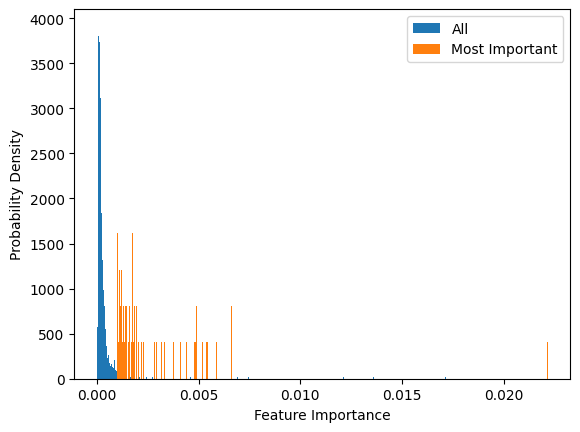

In [28]:
# Sort the feature importances into descending order.
sorted_feature_importance = np.flip(np.argsort(forest.feature_importances_))

# Create an arbitrary mask to find importances above a threshold
mask = forest.feature_importances_ > 0.001
print(f'Number of most important clusters: {sum(mask)}')

# Plot the feature importances
plt.hist(forest.feature_importances_, bins=1000, density = True, label="All")
plt.hist(forest.feature_importances_[mask], bins=1000, density = True, label = "Most Important")
plt.xlabel("Feature Importance"); plt.ylabel("Probability Density"); 
plt.legend(loc = "upper right")

The classification model uses only a fraction of the available clusters to make its decisions. The remaining clusters, used only a few times, may be contributing to overfitting, as the model looks to memorise the training dataset. We can assess this, by retraining the model on only a few hundred clusters.

In [29]:
# Reduce training feature vectors to contain only the most important
# clusters.
reduced_train_clusters = train_clusters[:,mask]

start = time.time()

# Create a new Random Forest model.
reduced_forest = RandomForestClassifier(n_estimators=100, bootstrap=True, oob_score=True)

# Fit the new model to the training data
reduced_forest.fit(reduced_train_clusters, train["sentiment"])
print(f'Training Time for Random Forest Model = {time.time()-start} s')

# Assess model
print(f'Out of Bag Score: {reduced_forest.oob_score_:.2f}')

# Predict sentiment labels for the validation set
reduced_validate_clusters = validate_clusters[:,mask];
validation_predictions = reduced_forest.predict(reduced_validate_clusters)
print(classification_report(validate["sentiment"], validation_predictions))

Training Time for Random Forest Model = 2.138252019882202 s
Out of Bag Score: 0.82
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      3739
           1       0.83      0.83      0.83      3761

    accuracy                           0.83      7500
   macro avg       0.83      0.83      0.83      7500
weighted avg       0.83      0.83      0.83      7500



Significantly reducing the number of clusters (and therefore features) within the training dataset has limited impact on the accuracy of the model, whilst reducing the training time by approximately 7 times. 

Finally, just for interest, we can look at the most important clusters and the words they contained.

In [30]:
# Print words in 10 most important clusters.
keys = []
for c in sorted_feature_importance[:10]:
    words = []
    for key, value in word_map.items():
        if value == c:
            words.append(key)

    print("Corresponding Words:", words)

Corresponding Words: ['bad']
Corresponding Words: ['worst']
Corresponding Words: ['great']
Corresponding Words: ['waste']
Corresponding Words: ['awful']
Corresponding Words: ['terrible', 'horrible']
Corresponding Words: ['brilliant', 'fantastic', 'superb', 'terrific', 'outstanding']
Corresponding Words: ['excellent']
Corresponding Words: ['lazy', 'stupidity', 'idiotic', 'useless', 'trite', 'cardboard', 'childish', 'meaningless', 'superficial', 'clumsy', 'inane', 'irrelevant', 'cliche', 'inducing', 'senseless', 'stilted', 'mundane', 'stale', 'illogical', 'moronic', 'nonsensical', 'banal', 'incomprehensible', 'pitiful', 'insipid', 'hackneyed', 'imaginable', 'unimaginative']
Corresponding Words: ['dreadful', 'atrocious', 'horrid', 'horrendous', 'unwatchable', 'worthless', 'appalling', 'abysmal']


<h2>Conclusions</h2>
To conclude:

* Using the Kaggle Getting Started: Bag of Words meets Bags of Popcorn data, we have explored three methods to represent text within Natural Language Processing.

* Firstly we explored the Bag of Words method. This worked well for the sentiment analysis investigated here, however have a large dimensionality which result in memory inefficiencies.

* Next, we explored word embeddings. These reduce the dimensionality of the words and allow context, but processing them into feature vectors is non-trivial.

* Initially, the average word embedding for all words in a review was used as the feature vector input to the sentiment analysis model. The resultant model performed similarly to the Bag of Words based model, though it is likely that by averaging the word embeddings, vital information was lost.

* Then, a clustering model was used to cluster similar word embeddings. The feature vectors for the reviews were then a count of how many times a word from each cluster appeared in the review. This worked well however the model primarily used only a small number of clusters to decide the sentiment.

* Removing the less important clusters reduced the dimensionality of the model, speeding up training, whilst having limited impact of the accuracy of the model.
